<a href="https://colab.research.google.com/github/hadil1999-creator/Summer-Internship-at-Innov-com/blob/main/INNOV'COM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Face Emotional Recongnition:
3 steps:a) face detection, b) facial expression detection, c) expression classification to an emotional state

In [ ]:
import numpy as np
import tensorflow as tf
import os
import PIL
import PIL.Image

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

1/ Face Detection


1.1 Downloading the dataset for Face detection

/This dataset is only to test the efficacity of functions and to chnage parameteres...else we will use the camera for capturing images or real time videos/

In [ ]:
!kaggle datasets download -d stoicstatic/face-recognition-dataset

 98% 178M/181M [00:05<00:00, 45.1MB/s]
100% 181M/181M [00:05<00:00, 33.4MB/s]


In [ ]:
!unzip face-recognition-dataset.zip

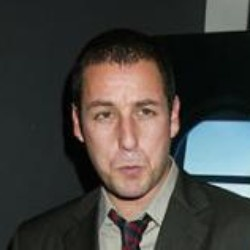

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='/content/Face Data/Face Dataset/10/0.jpg')
display(pil_img)

1.2 Face Detection with images in database(for exemple)



In [ ]:
import cv2
import sys

In [ ]:
cv2.__version__

'4.1.2'

*Haarcascade classifier already built in opencv*

In [ ]:
imagePath = sys.argv[1]
cascPath = "haarcascade_frontalface_default.xml"

*We can add specificities like eyes detection or anyother feature needed to future use*

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascPath)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [ ]:
image = cv2.imread('/content/Face Data/Face Dataset/10/0.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.1, 2)

In [ ]:
for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


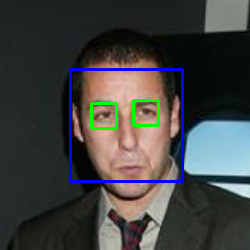

In [ ]:
from google.colab.patches import cv2_imshow
# Display the output
cv2_imshow(image)


*Having all the code in one function*

In [ ]:
def detect(path):
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 3)
  for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  from google.colab.patches import cv2_imshow
  cv2_imshow(image)
 

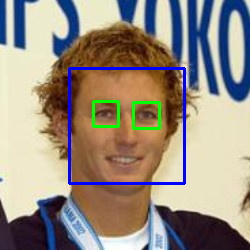

In [ ]:
detect('/content/Face Data/Face Dataset/0/1.jpg')

1.3 Face Detection through real time images




In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

*Helper functions of JS*

*convert images from javascript to opencv*

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

*Use code within Google Colab's **Code Snippets** that has a variety of useful code functions to perform various tasks.*

*We will be using the code snippet for **Camera Capture** to utilize your computer's webcam.*

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
#photo.jpg is the variable which will store the captured image
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray,1.1,3)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
#it will give us the hight and width 
#it will save the capture into photo.jpg found in the left

1.4 Face Detection through real time videos

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8) #the different thing between image capturing and video capturing

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray,1.1,3)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


<IPython.core.display.Javascript object>

Data Augmenetation

In [ ]:
shape = [256, 256, 256]
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder( shape = shape, dtype = tf.float32)
flip_2 = tf.image.flip_up_down(x)
flip_3 = tf.image.flip_left_right(x)
flip_4 = tf.image.random_flip_up_down(x)
flip_5 = tf.image.random_flip_left_right(x)

2/ Face Recongition

2.1 Downloading the Dataset

In [ ]:
!kaggle datasets download -d jessicali9530/lfw-dataset

 93% 105M/112M [00:04<00:00, 22.8MB/s] 
100% 112M/112M [00:04<00:00, 28.2MB/s]


In [ ]:
!unzip lfw-dataset.zip

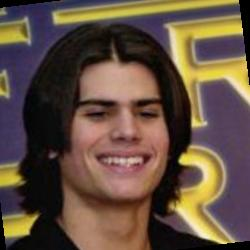

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='/content/lfw-deepfunneled/lfw-deepfunneled/AJ_Lamas/AJ_Lamas_0001.jpg')
display(pil_img)


*lfwallnames.csv: Contains all names of each face in the dataset along with number of images each face has.*

In [ ]:
import pandas as pd
df =  pd.read_csv('/content/lfw_allnames.csv')
df

*people.csv: Contains randomly generated splits for 10-fold cross validation specifically for individual faces. Use this for the unrestricted configuration when forming training sets (refer to readme). There are 10 total sets, each with a different amount of people; Set 1: 601. Set 2: 555. Set 3: 552. Set 4: 560. Set 5: 567. Set 6: 527. Set 7: 597. Set 8: 601. Set 9: 580. Set 10: 609.*

In [ ]:
df1 =  pd.read_csv('/content/people.csv')
df1

--Decide to go with the people configuration.(there are two configurations as mentioned on Kaggle: people and pairs configurations)

*peopleDevTrain.csv:Contains 4038 people and 9525 images.*

In [ ]:
train =  pd.read_csv('/content/peopleDevTrain.csv')
train

*peopleDevTest.csv: Contains 1711 people and 3708 images.*

In [ ]:
test =  pd.read_csv('/content/peopleDevTest.csv')
test

In [ ]:
!pip install split-folders


In [ ]:
import splitfolders
splitfolders.ratio('/content/lfw-deepfunneled/lfw-deepfunneled', output="output", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 13233 files [00:06, 1952.43 files/s]


*CNN Model*

*LeNet5 Architecture*

*7 layers without considering the input layer*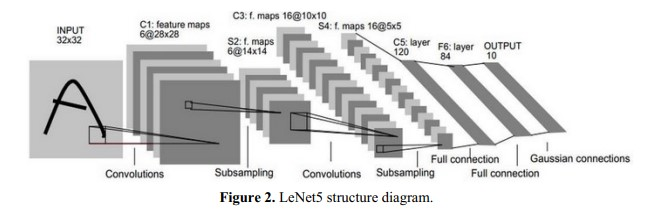

In [ ]:
import os
from keras.models import Sequential
import keras
from keras import layers
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D

*Checking the size of the dataset images*

In [ ]:
import cv2
im = cv2.imread('/content/lfw-deepfunneled/lfw-deepfunneled/AJ_Lamas/AJ_Lamas_0001.jpg')
print(type(im))
print(im.shape)
print(type(im.shape))


<class 'numpy.ndarray'>
(250, 250, 3)
<class 'tuple'>


In [ ]:
from keras.preprocessing import image
image_size = (32,32)
batch_size = 32
train = tf.keras.preprocessing.image_dataset_from_directory('/content/output/train', seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 5727 files belonging to 5749 classes.


In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=5749, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 6)         168       
                                                                 
 average_pooling2d_2 (Averag  (None, 15, 15, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9,decay=0.01)
#opt = tf.keras.optimizers.Adam(learning_rate=0.05)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt, metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10)


In [ ]:
model_fit = model.fit(train, epochs=100,callbacks=[rlrop])

Epoch 1/100
 95/179 [==============>...............] - ETA: 1s - loss: 6.5043 - accuracy: 0.0618

KeyboardInterrupt: ignored

3/Emotion Recognition 

3.1 Downloading the Dataset from kaggle

In [ ]:
! kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 87% 105M/121M [00:00<00:00, 227MB/s] 
100% 121M/121M [00:00<00:00, 218MB/s]


In [ ]:
!unzip face-expression-recognition-dataset.zip


In [ ]:
!rm -rf images/images

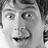

In [ ]:
from IPython.display import Image 
pil_img = Image(filename='images/validation/surprise/993.jpg')
display(pil_img)


In [ ]:
from keras.preprocessing import image
image_size = (48,48)
batch_size = 32
train_data = tf.keras.preprocessing.image_dataset_from_directory('images/train', seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 28821 files belonging to 7 classes.


In [ ]:
test_data = tf.keras.preprocessing.image_dataset_from_directory('images/validation', seed = 1000,image_size=image_size, batch_size = batch_size,color_mode='rgb')

Found 7066 files belonging to 7 classes.


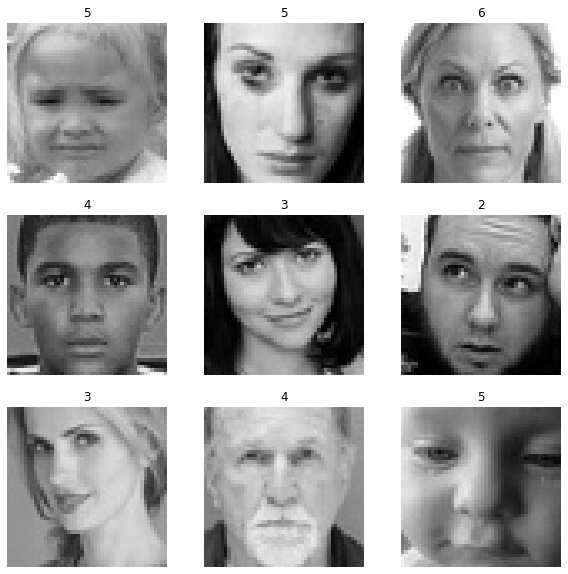

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  for i in range(9):
     ax = plt.subplot(3,3, i+1)
     plt.imshow(images[i].numpy().astype("uint8"))
     plt.title(int(labels[i]))
     plt.axis("off")

3.2 Defining the classes

*Giving every class a numerical*

In [ ]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']
class_to_index = dict((c,i) for i, c in enumerate(classes))
class_to_index

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

*Case studying*

In [ ]:
switcher={
    0: 'anger',
    1 : 'disgust',
    2: 'fear',
    3:'happy',
    4:'neutral',
    5:'sad',
    6:'surprise',
    
  }
def index_to_class(n):
  return(switcher.get(n))

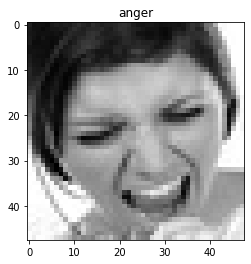

In [ ]:
img=[]
lab=[]
for images, labels in train_data.take(1):
  for i in range(len(images)):
    img.append(images[i].numpy().astype("uint8"))
    lab.append(index_to_class((int(labels[i]))))
    plt.imshow(img[i])
    plt.title(lab[i])
    img[i].shape

*Facial Expression Recognition(FER)Challenge
Cover image*
CSV file from kaggle



3.3 Build the Model

In [ ]:
import keras.api._v2.keras as keras 
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D

In [ ]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
model.compile(loss="mse" ,optimizer= RMSprop(learning_rate=0.001), metrics=['accuracy'])


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', verbose=1)
model_fit = model.fit(train_data, epochs=30)  

In [ ]:
img=[]
lab=[]
for images, labels in validation_data.take(1):
  for i in range(len(images)):
    img.append(images[i].numpy().astype("uint8"))
    lab.append(index_to_class((int(labels[i]))))
    plt.imshow(img[i])
    prediction = model.predict(img[i])
    plt.title(prediction)
    

In [ ]:
import numpy as np
from PIL import Image
prediction = model.predict(validation_data)
print(prediction)



[[4.4828568 4.4828396 4.4828587 4.4828653 4.4828353]
 [2.7308445 2.7310119 2.7308223 2.7307615 2.731051 ]
 [1.8813087 1.881404  1.8812959 1.8812611 1.8814265]
 ...
 [3.184341  3.1844606 3.1843252 3.1842818 3.1844885]
 [2.095859  2.0960932 2.095828  2.095743  2.096148 ]
 [2.9910092 2.9910254 2.9910069 2.9910011 2.9910295]]
